## Grid Search Hyperparameter optimization

#### <font color='teal'>Load the necessary packages

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)
from sklearn import preprocessing

#### <font color='teal'>Load the diabetes data

In [52]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [53]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [54]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [55]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] 
diabetes_data[cols] = diabetes_data[cols].replace(['0', 0], np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

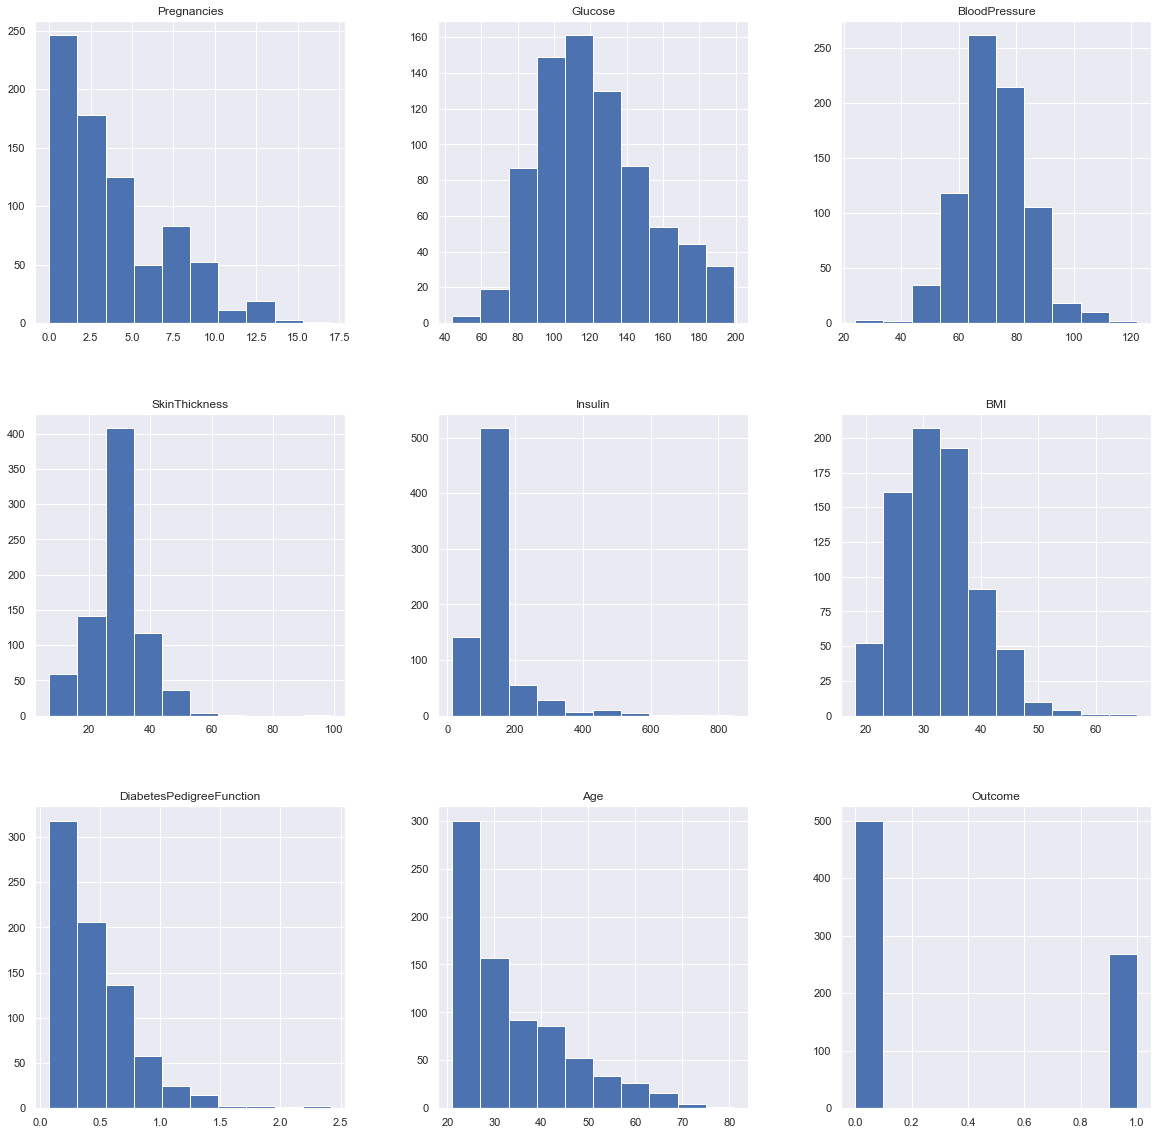

In [71]:
p=diabetes_data.hist(figsize = (20,20))

#### Replace the zeros with mean and median values.

In [57]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

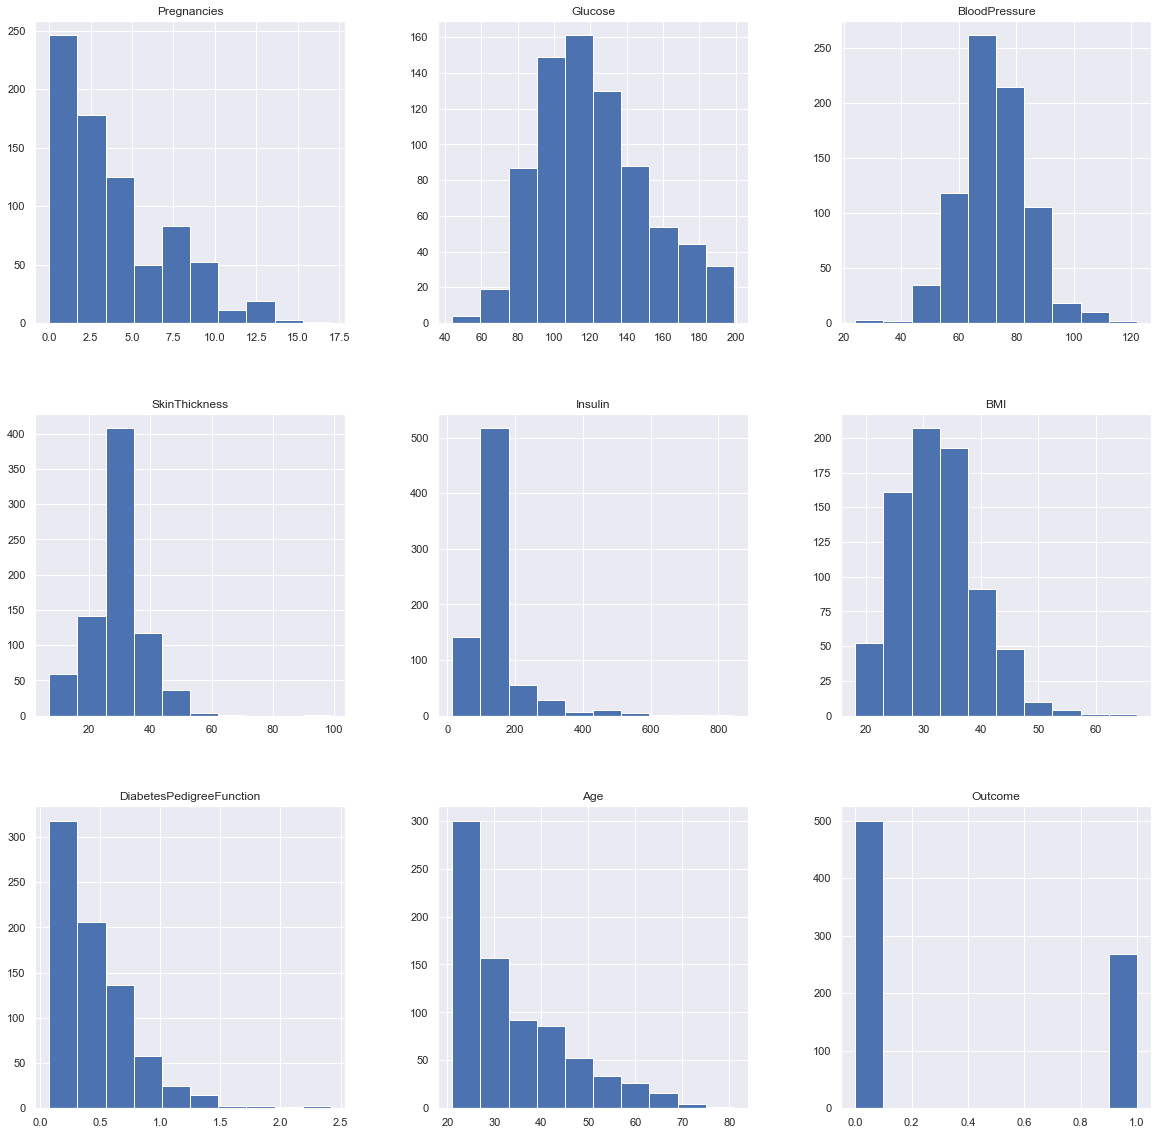

In [72]:
p=diabetes_data.hist(figsize = (20,20))

#### Plot the correlation matrix heatmap

Correlation between various features


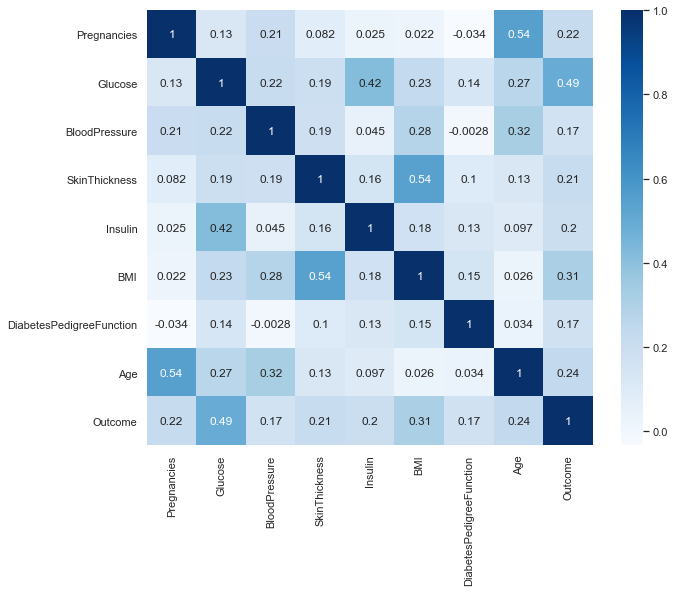

In [159]:
plt.figure(figsize=(10,8))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

In [60]:
y = diabetes_data['Outcome']
X = diabetes_data.drop('Outcome',axis=1)

In [63]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=random_seed_number)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [147]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [148]:
print(train_scores)
print(test_scores)

[1.0, 0.8435754189944135, 0.8547486033519553, 0.8379888268156425, 0.8379888268156425, 0.819366852886406, 0.8324022346368715, 0.819366852886406, 0.819366852886406, 0.8230912476722533, 0.8212290502793296, 0.8119180633147114, 0.8212290502793296, 0.8212290502793296, 0.8063314711359404, 0.8100558659217877, 0.8100558659217877, 0.8175046554934823, 0.813780260707635, 0.8081936685288641, 0.8007448789571695, 0.7951582867783985, 0.7914338919925512, 0.7914338919925512, 0.7914338919925512, 0.7914338919925512, 0.7895716945996276, 0.7821229050279329, 0.7858472998137802, 0.7858472998137802, 0.7895716945996276, 0.7839851024208566, 0.7858472998137802, 0.7877094972067039, 0.7877094972067039, 0.7895716945996276, 0.7951582867783985, 0.7839851024208566, 0.7895716945996276, 0.7877094972067039, 0.7858472998137802, 0.776536312849162, 0.7821229050279329, 0.7728119180633147, 0.776536312849162, 0.7672253258845437, 0.7728119180633147, 0.7690875232774674, 0.7746741154562383]
[0.6666666666666666, 0.670995670995671, 

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [149]:
max_train_score = max(train_scores)
train_scores_itr = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_itr))))

Max train score 100.0 % and k = [1]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [150]:
max_test_score = max(test_scores)
test_scores_itr = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_itr))))

Max test score 75.75757575757575 % and k = [23, 24]


Plot the train and test model performance by number of neighbors.

/Users/balaji/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/balaji/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


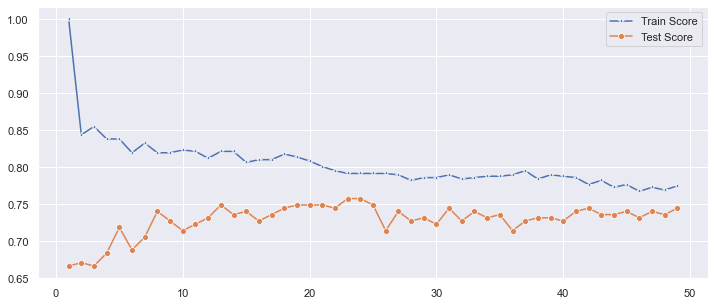

In [151]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [153]:
knn = KNeighborsClassifier(23)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7575757575757576

In [154]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

<AxesSubplot:>

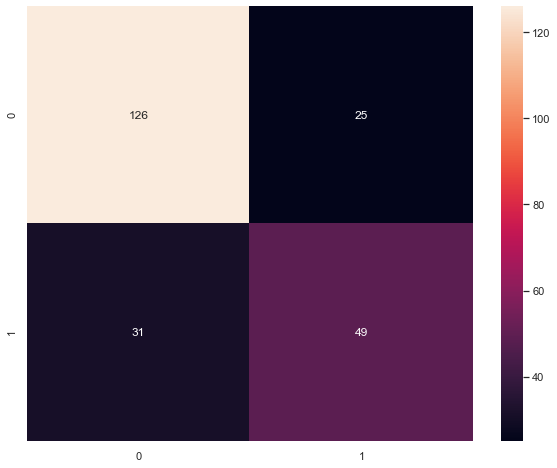

In [155]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
sns.heatmap(pl, annot=True, fmt='g')

**<font color='teal'> Print the classification report </font>**

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. 

#### The code below implements the grid search method for identifying the best parameter value for the n_neighbors parameter. 

In [157]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [158]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 